<IPython.core.display.Javascript object>


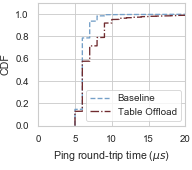

In [9]:
%matplotlib notebook
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import re

sns.set_style('whitegrid')
sns.set_context('paper')

FIGSIZE=(4*.6,3*.71)
def main():
    fig = plt.figure(figsize = FIGSIZE)
    fn = "baselinePingLog.txt"
    plotPings(fn, "Baseline", "--")
    fn = "oneHopPingLog.txt"
    plotPings(fn, "Table Offload", "-.")

    plt.xlabel(r"Ping round-trip time ($\mu s$)")
    plt.ylabel("CDF")
    plt.xlim((0, 20))
    plt.ylim((0, 1.1))
    plt.xticks([0, 5, 10, 15, 20])
    plt.legend()
    plt.tight_layout(pad=.1)

    fig.subplots_adjust(bottom=0.26, top=.98)
    plt.savefig("ping_rtt.pdf")


def plotPings(fn, label, ls, **kwargs):
    txt = open(fn, "r").read()
    times = re.findall("time=(.*) ms", txt)
    times = [float(t) * 1e3 for t in times]
    x, y = ecdf(times)
    plt.plot(x, y, label = label, linestyle = ls, **kwargs)
    # plt.plot(range(len(times)), times, label=label)

def ecdf(x):
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

main()